# Tensorflow Basics
### Kyle McLester

In [1]:
import sys
assert sys.version_info >= (3, 5)

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0" # check if your ensorflow version is above 2.0

In [2]:
# Tools from text for consistant results

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
node1 = tf.constant(3.0, dtype=tf.float32)
print('node1:', node1)

node1: tf.Tensor(3.0, shape=(), dtype=float32)


In [4]:
node2 = tf.constant(4.0) 
print('node2:', node2)

node2: tf.Tensor(4.0, shape=(), dtype=float32)


In [5]:
nodea = tf.constant([1,2,3], dtype=tf.float32)
nodeb = tf.constant([4,5,6]) # defaults to tf.int32
print('nodea:', nodea)
print('nodeb:', nodeb)

nodea: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
nodeb: tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [6]:
nodeA = tf.constant([[1,2,3], [1,2,3]], dtype=tf.float32)
nodeB = tf.constant([[4,5,6], [4,5,6]]) # defaults to tf.int32
print('nodeA:', nodeA)
print('nodeB:', nodeB)

nodeA: tf.Tensor(
[[1. 2. 3.]
 [1. 2. 3.]], shape=(2, 3), dtype=float32)
nodeB: tf.Tensor(
[[4 5 6]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [7]:
print('node1 shape:', node1.shape)
print('nodeb shape:', nodeb.shape)
print('nodeB shape:', nodeB.shape)

node1 shape: ()
nodeb shape: (3,)
nodeB shape: (2, 3)


In [8]:
print('node1 shape:', node1.dtype)
print('nodeb shape:', nodeb.dtype)
print('nodeB shape:', nodeB.dtype)

node1 shape: <dtype: 'float32'>
nodeb shape: <dtype: 'int32'>
nodeB shape: <dtype: 'int32'>


In [9]:
print("node1:", node1.numpy())
print("nodeb:", nodeb.numpy()) 
print("nodeB:\n", nodeB.numpy())

node1: 3.0
nodeb: [4 5 6]
nodeB:
 [[4 5 6]
 [4 5 6]]


In [10]:
print(node1 + node2)

tf.Tensor(7.0, shape=(), dtype=float32)


In [11]:
try:
    nodea + nodeb
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [12]:
print('nodea before casting:', nodea)
print('nodea after casting:', tf.cast(nodea, tf.int32))

nodea before casting: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
nodea after casting: tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [13]:
print(tf.cast(nodea, tf.int32) + nodeb)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)


In [14]:
nodeC = nodeA + tf.cast(nodeB, tf.float32)
print(nodeC)

tf.Tensor(
[[5. 7. 9.]
 [5. 7. 9.]], shape=(2, 3), dtype=float32)


In [15]:
nodeC[:, 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([7., 7.], dtype=float32)>

In [16]:
column_matrix = nodeC[:, 1, None]   # or nodeC[:, 1, tf.newaxis]
if (2,1) != column_matrix.shape:
    raise ValueError("Your sliced matrix does not have the shape (2, 1)")

In [17]:
array = np.arange(4)
array

array([0, 1, 2, 3])

In [18]:
tensor = tf.constant(array)
tensor

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 3])>

In [19]:
tensor.numpy()

array([0, 1, 2, 3])

In [20]:
np.array(tensor)

array([0, 1, 2, 3])

In [21]:
tf.square(array)  # passing numpy array to tensorflow

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

In [22]:
np.square(tensor)  # passing tf tensor

array([0, 1, 4, 9], dtype=int32)

In [23]:
string_tensor = tf.constant('Hello, world!')
print(string_tensor)

tf.Tensor(b'Hello, world!', shape=(), dtype=string)


In [24]:
# Convert string to unicode
string = "Hello, world!"
[ord(ch) for ch in string]

# Load unicode into tensor
unicode_tensor = tf.strings.unicode_decode(string, "UTF-8")
print(unicode_tensor)

tf.Tensor([ 72 101 108 108 111  44  32 119 111 114 108 100  33], shape=(13,), dtype=int32)


In [25]:
string_tensor = tf.strings.unicode_encode(unicode_tensor, "UTF-8")
print(string_tensor)

tf.Tensor(b'Hello, world!', shape=(), dtype=string)


In [26]:
string_tensor = tf.constant(['hello', 'world!', 'itcs4156'])
print(string_tensor)

tf.Tensor([b'hello' b'world!' b'itcs4156'], shape=(3,), dtype=string)


In [27]:
tf.strings.length(string_tensor, unit="UTF8_CHAR")

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5, 6, 8])>

In [28]:
ragged_tensor = tf.strings.unicode_decode(string_tensor, "UTF-8")
ragged_tensor

<tf.RaggedTensor [[104, 101, 108, 108, 111], [119, 111, 114, 108, 100, 33], [105, 116, 99, 115, 52, 49, 53, 54]]>

In [29]:
ragged_tensor.shape

TensorShape([3, None])

In [30]:
ragged_tensor = tf.ragged.constant([[1,2,3],[1], [1,2,3,4,5]])
print(ragged_tensor)
print(ragged_tensor.shape)

<tf.RaggedTensor [[1, 2, 3], [1], [1, 2, 3, 4, 5]]>
(3, None)


In [31]:
tensor = ragged_tensor.to_tensor()
print(tensor)
print(tensor.shape)

tf.Tensor(
[[1 2 3 0 0]
 [1 0 0 0 0]
 [1 2 3 4 5]], shape=(3, 5), dtype=int32)
(3, 5)


In [32]:
sparse_array = np.zeros((8, 8))
sparse_array[(1, 1), (2, 5)] = 1
sparse_array

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
tensor = tf.constant(sparse_array)
print(tensor)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(8, 8), dtype=float64)


In [34]:
sparse_tensor = tf.SparseTensor(indices=[(1, 2), (1, 5)], values=[1,1], dense_shape=[8,8])
print(sparse_tensor)

SparseTensor(indices=tf.Tensor(
[[1 2]
 [1 5]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 1], shape=(2,), dtype=int32), dense_shape=tf.Tensor([8 8], shape=(2,), dtype=int64))


In [35]:
dense_tensor = tf.sparse.to_dense(sparse_tensor)
print(dense_tensor)

tf.Tensor(
[[0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]], shape=(8, 8), dtype=int32)


In [36]:
a = [1, 2, 3]
v = tf.Variable(a)
print(v)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>


In [37]:
v[1].assign(5)
print(v)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 5, 3])>


In [38]:
v.assign(v*2)
print(v)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([ 2, 10,  6])>


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing

%matplotlib inline

In [40]:
# Load housing dataset Bunch object
housing = fetch_california_housing()

# Concat and cast data as array
X_T = np.c_[housing.data, housing.target]

# Cast data as DataFrame
df = pd.DataFrame(X_T)
df.describe()

# Add an extra feature name for target visualization
df.columns = housing.feature_names + ['Avg. Value']

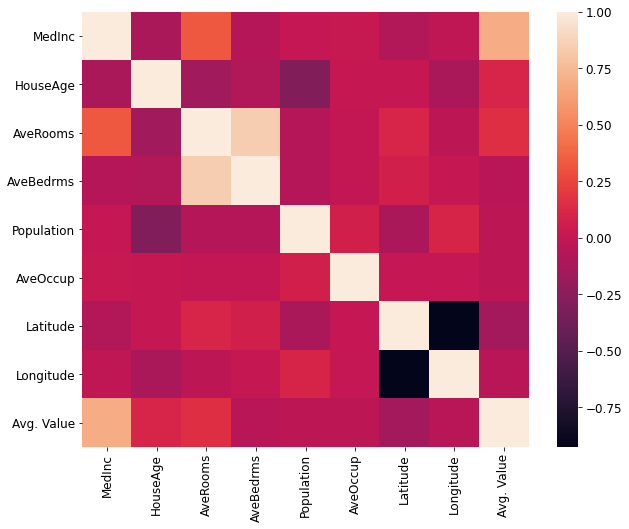

In [41]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [42]:
import partitionlib as ptl

In [43]:
import importlib
import partitionlib
importlib.reload(partitionlib);

In [44]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(X, T)
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    return Xtrain, Xtest, Ttrain, Ttest

In [45]:
# Partition data
Xtrain, Xtest, Ttrain, Ttest = partition_data(housing.data, housing.target)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (16512, 8)
Train target shape: (16512, 1)
Test data shape: (4128, 8)
Test target shape: (4128, 1)


In [46]:
# Save total number of features
D = Xtrain.shape[1]
# Save number of samples for train/trest
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total features: 8
Number of training samples: 16512
Number of testing samples: 4128


In [47]:
# Let's normalize the data first with Scikit.learn
from sklearn.preprocessing import StandardScaler

# Define standardization class and standardize our housing data
scaler = StandardScaler()
XtrainS = scaler.fit_transform(Xtrain)
XtestS = scaler.fit_transform(Xtest)

# Add bias to standardized data
X1trainS = np.c_[np.ones((Ntrain, 1)), XtrainS]
X1testS = np.c_[np.ones((Ntest, 1)), XtestS]

In [48]:
T = housing.target.reshape(-1, 1)
w = np.linalg.lstsq(X1trainS.T @ X1trainS, X1trainS.T @ Ttrain)[0]

print('Learned Weights: {}'.format(w))
print("MSE: {}".format(np.mean((X1trainS @ w - Ttrain)**2)))

Learned Weights: [[ 2.06929389]
 [ 0.85092044]
 [ 0.11817383]
 [-0.26810309]
 [ 0.29588438]
 [-0.00524713]
 [-0.03975324]
 [-0.89750265]
 [-0.87231024]]
MSE: 0.5161141703444575


<ipython-input-48-f571ffa173d4>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X1trainS.T @ X1trainS, X1trainS.T @ Ttrain)[0]


In [49]:
Xt = tf.constant(X1trainS)
Xt

<tf.Tensor: shape=(16512, 9), dtype=float64, numpy=
array([[ 1.        ,  0.49402549,  0.26431702, ..., -0.08326908,
         1.05857401, -1.22811384],
       [ 1.        , -1.01645289,  0.81813505, ..., -0.04085063,
        -0.70186546,  1.13515186],
       [ 1.        ,  5.0572979 , -0.21038415, ..., -0.00745401,
        -0.88446424,  0.89136234],
       ...,
       [ 1.        ,  2.27006047, -0.28950102, ..., -0.04057566,
        -0.87041818,  0.61772105],
       [ 1.        ,  0.8618936 ,  0.97636877, ..., -0.02070487,
        -0.7112295 ,  0.74707875],
       [ 1.        ,  1.35932466,  0.5016676 , ..., -0.06860372,
        -0.71591152,  0.49333865]])>

In [50]:
Tt = tf.constant(Ttrain)
Tt

<tf.Tensor: shape=(16512, 1), dtype=float64, numpy=
array([[3.212  ],
       [0.89   ],
       [5.00001],
       ...,
       [5.00001],
       [3.25   ],
       [4.07   ]])>

In [51]:
w = tf.linalg.lstsq(tf.matmul(tf.transpose(Xt), Xt), tf.matmul(tf.transpose(Xt), Tt))
w

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[ 2.06929389],
       [ 0.85092044],
       [ 0.11817383],
       [-0.26810309],
       [ 0.29588438],
       [-0.00524713],
       [-0.03975324],
       [-0.89750265],
       [-0.87231024]])>

In [52]:
print('Learned Weights: {}'.format(w))
print("MSE: {}".format(np.mean((Xt @ w - Tt)**2)))

Learned Weights: [[ 2.06929389]
 [ 0.85092044]
 [ 0.11817383]
 [-0.26810309]
 [ 0.29588438]
 [-0.00524713]
 [-0.03975324]
 [-0.89750265]
 [-0.87231024]]
MSE: 0.5161141703444576


# Least Mean Squares and Gradient Descent 

Now, let's implement LMS with TensorFlow. Instead of computing each sample gradient one at a time, like normal, we'll compute all the gradients at once. To account for this, we must divide by our total number of training  samples $n$.

Recall computing the gradient for a single sample (i.e. the derivative of our MSE loss function) is as follows.

$\nabla E_k = 2 *  x_k^T \cdot( x_k \cdot w - t_k)$

Thus, if we want to compute all gradients at once our equation simply becomes the following.

$\nabla E = \frac{2}{n} * X^T \cdot (X \cdot w  - T)$

To compute our weight update recall we use the following formula.

$w = w - \alpha * \nabla E$

Here $\alpha$ is our learning rate and $\nabla E$ contains the gradients for for all the training data samples.

In [53]:
n_epochs = 1000
learning_rate = 0.01

# Cast our training data as tensors
Xt = tf.constant(X1trainS, dtype=tf.float32)
Tt = tf.constant(Ttrain, dtype=tf.float32)

# Notice we use tf.Variable which works just like tf.constant but 
# now we can change the value of the tensor using w.assign().
w = tf.Variable(tf.random.uniform([D + 1, 1], -1.0, 1.0, seed=42), name="w")

print("Randomly initialized weights: {}".format(w))
for epoch in range(n_epochs):
    Yt = tf.matmul(Xt, w, name="predictions")
    error = Yt - Tt
    # Compute the loss function
    mse = tf.reduce_mean(tf.square(error), name="mse")
    # Compute the gradient of the loss function
    gradients = 2/Ntrain * tf.matmul(tf.transpose(Xt), error)
    # Update weights given gradients
    w.assign(w - learning_rate * gradients)
    
    if epoch % 100 == 0:
        print("Epoch", epoch, "MSE = {}".format(mse))

print(w)        

Randomly initialized weights: <tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.9045429 ],
       [ 0.35481548],
       [ 0.5906365 ],
       [ 0.51156354],
       [-0.04808879],
       [ 0.26202965],
       [-0.62795925],
       [-0.7713845 ],
       [-0.32755637]], dtype=float32)>
Epoch 0 MSE = 2.7329087257385254
Epoch 100 MSE = 0.6358025074005127
Epoch 200 MSE = 0.5691298842430115
Epoch 300 MSE = 0.551232635974884
Epoch 400 MSE = 0.5399760007858276
Epoch 500 MSE = 0.532360315322876
Epoch 600 MSE = 0.5271776914596558
Epoch 700 MSE = 0.5236486196517944
Epoch 800 MSE = 0.5212453603744507
Epoch 900 MSE = 0.5196087956428528
<tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[ 2.0692880e+00],
       [ 8.0750304e-01],
       [ 1.2870954e-01],
       [-1.6992760e-01],
       [ 2.0297259e-01],
       [-1.2004862e-03],
       [-3.9631341e-02],
       [-8.5336137e-01],
       [-8.2138354e-01]], dtype=float32)>


In [54]:
n_epochs = 1000
learning_rate = 0.01

# Cast our training data as tensors
Xt = tf.constant(X1trainS, dtype=tf.float32)
Tt = tf.constant(Ttrain, dtype=tf.float32)

# Notice we use tf.Variable which works just like tf.constant but 
# now we can change the value of the tensor using w.assign().
w = tf.Variable(tf.random.uniform([D + 1, 1], -1.0, 1.0, seed=42), name="w")

print(w)
for epoch in range(n_epochs):

    with tf.GradientTape() as tape:
        Yt = tf.matmul(Xt, w, name="predictions")
        error = Yt - Tt
        loss = tf.reduce_mean(tf.square(error), name="mse")

    gradients = tape.gradient(loss, w)
    w.assign(w - learning_rate * gradients)

    if epoch % 100 == 0:
        print("Epoch", epoch, "MSE = {}".format(loss))

print(w)

<tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.12018752],
       [-0.39934063],
       [ 0.33478546],
       [-0.25189137],
       [-0.753314  ],
       [ 0.3486998 ],
       [ 0.23956943],
       [ 0.8812921 ],
       [ 0.7901039 ]], dtype=float32)>
Epoch 0 MSE = 8.53220272064209
Epoch 100 MSE = 1.0074163675308228
Epoch 200 MSE = 0.7985183596611023
Epoch 300 MSE = 0.7192814350128174
Epoch 400 MSE = 0.6643697023391724
Epoch 500 MSE = 0.6252717971801758
Epoch 600 MSE = 0.5972221493721008
Epoch 700 MSE = 0.5769432783126831
Epoch 800 MSE = 0.5621609687805176
Epoch 900 MSE = 0.5512906312942505
<tf.Variable 'w:0' shape=(9, 1) dtype=float32, numpy=
array([[ 2.069288  ],
       [ 0.90842706],
       [ 0.17396776],
       [-0.29101375],
       [ 0.26948527],
       [ 0.0126799 ],
       [-0.04627208],
       [-0.41508487],
       [-0.3917836 ]], dtype=float32)>


In [55]:
def mse_loss(y, t):
    return tf.reduce_mean(tf.square(y-t), name="mse")

In [56]:
Xt = tf.constant(X1testS, dtype=tf.float32)
Tt = tf.constant(Ttest,  dtype=tf.float32)

y = tf.matmul(Xt, w)
print("MSE: {}".format(mse_loss(y, Tt)))

MSE: 0.575303316116333


In [57]:
from datetime import datetime
from os.path import join

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = join(root_logdir, 'run-{}'.format(now))
logdir

'tf_logs\\run-20210319034050'

In [58]:
# Build network structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Build model with loss and optimizer 
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=0.001))

# Create a tensorboard callback for keras so we can visualize our graph and variables later with tensorboard later
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

In [59]:
history = model.fit(X1trainS, Ttrain, epochs=30, callbacks=[tensorboard_cb])

Epoch 1/30
516/516 [==============================] - 0s 381us/step - loss: 3.6729
Epoch 2/30
516/516 [==============================] - 0s 280us/step - loss: 0.8016
Epoch 3/30
516/516 [==============================] - 0s 280us/step - loss: 0.6010
Epoch 4/30
516/516 [==============================] - 0s 299us/step - loss: 0.5923
Epoch 5/30
516/516 [==============================] - 0s 284us/step - loss: 0.5454
Epoch 6/30
516/516 [==============================] - 0s 300us/step - loss: 0.5554
Epoch 7/30
516/516 [==============================] - 0s 298us/step - loss: 0.5623
Epoch 8/30
516/516 [==============================] - 0s 282us/step - loss: 0.5692
Epoch 9/30
516/516 [==============================] - 0s 288us/step - loss: 0.5343
Epoch 10/30
516/516 [==============================] - 0s 289us/step - loss: 0.5343
Epoch 11/30
516/516 [==============================] - 0s 282us/step - loss: 0.5180
Epoch 12/30
516/516 [==============================] - 0s 279us/step - loss: 0.5079
E

In [60]:
history.history.keys()

dict_keys(['loss'])

In [61]:
history.history['loss']

[2.337959051132202,
 0.7220359444618225,
 0.6035013198852539,
 0.5773985981941223,
 0.5646565556526184,
 0.5556811690330505,
 0.5486496686935425,
 0.5426814556121826,
 0.53834468126297,
 0.534373939037323,
 0.5311345458030701,
 0.5286158919334412,
 0.5264691114425659,
 0.5246524810791016,
 0.5232945680618286,
 0.5220484137535095,
 0.5209720730781555,
 0.5203800201416016,
 0.519690215587616,
 0.5191011428833008,
 0.5186554193496704,
 0.5183647871017456,
 0.5179863572120667,
 0.5177544951438904,
 0.5175403356552124,
 0.5173500776290894,
 0.5172169208526611,
 0.5170592069625854,
 0.5169864296913147,
 0.5168925523757935]

In [62]:
y = model.predict(X1testS)
y

array([[4.1197104],
       [1.2786691],
       [2.7775052],
       ...,
       [1.0512646],
       [4.304368 ],
       [2.6330068]], dtype=float32)

In [63]:
error = model.evaluate(X1testS, Ttest)
error

129/129 [==============================] - 0s 274us/step - loss: 0.5464


0.5463863015174866

In [64]:
%load_ext tensorboard
%tensorboard --port 6006 --logdir tf_logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 12760.